In [1]:
pip install openpyxl

  Using cached openpyxl-3.0.10-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [100]:
# load the training dataset
# if necessary download the file
# !wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
dataset_delay = pd.read_excel('get_around_delay_analysis.xlsx')
dataset_pricing = pd.read_csv('get_around_pricing_project.csv')

In [9]:
dataset_delay.head(20)

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000.0,363965.0,mobile,canceled,NaN,NaN,NaN
1,507750.0,269550.0,mobile,ended,-81.0,NaN,NaN
2,508131.0,359049.0,connect,ended,70.0,NaN,NaN
3,508865.0,299063.0,connect,canceled,NaN,NaN,NaN
4,511440.0,313932.0,mobile,ended,NaN,NaN,NaN
5,511626.0,398802.0,mobile,ended,-203.0,NaN,NaN
6,511639.0,370585.0,connect,ended,-15.0,563782.0,570.0
7,512303.0,371242.0,mobile,ended,-44.0,NaN,NaN
8,512475.0,322502.0,mobile,canceled,NaN,NaN,NaN
9,513434.0,256528.0,connect,ended,23.0,NaN,NaN


In [10]:
dataset_delay.describe(include='all')

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


In [17]:
dataset_delay.state.value_counts()

ended       18045
canceled     3265
Name: state, dtype: int64

In [115]:
rentals_canceled = dataset_delay[dataset_delay['state'] == "canceled"].reset_index()
rentals_ended = dataset_delay[dataset_delay['state'] == "ended"].reset_index()


In [116]:
rentals_canceled['rental_id'][0] in rentals_ended['previous_ended_rental_id'].tolist()

False

In [117]:
rentals_ended['previous_ended_rental_id']

0             NaN
1             NaN
2             NaN
3        563782.0
4             NaN
           ...   
16340         NaN
16341         NaN
16342         NaN
16343         NaN
16344         NaN
Name: previous_ended_rental_id, Length: 16345, dtype: float64

In [123]:
len(rentals_ended['rental_id'].unique())

16345

In [90]:
rentals_canceled['IdinEnded'] = [1 if (x in rentals_ended['rental_id'].values) else 0 for x in rentals_canceled['previous_ended_rental_id']]

In [91]:
rentals_canceled['IdinEnded'].value_counts()

0    3036
1     229
Name: IdinEnded, dtype: int64

In [92]:
rentals_ended['nextCanceled'] = [1 if (x in rentals_canceled['previous_ended_rental_id'].values) else 0 for x in rentals_ended['rental_id']]

In [93]:
rentals_ended['nextCanceled'].value_counts()

0    17830
1      215
Name: nextCanceled, dtype: int64

In [11]:
dataset_delay.drop_duplicates().shape

(21310, 7)

In [97]:
rentals_ended.groupby('nextCanceled').aggregate('mean')

,index,rental_id,car_id,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
nextCanceled,,,,,,
0,10674.918508,549893.484633,349909.646887,61.88794,550004.085660,275.539340
1,10789.846512,551063.306977,351637.758140,-32.46114,550527.055556,344.166667


In [95]:
dataset_delay.shape

(21310, 7)

In [6]:
# Drop the rows where at least one element is missing.
dataset_delay = dataset_delay.dropna(subset = ['delay_at_checkout_in_minutes'])

In [10]:
dataset_delay.shape

(16346, 7)

In [12]:
dataset_pricing.head()

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [113]:
dataset_delay

16346

In [12]:
dataset_pricing.columns

Index(['Unnamed: 0', 'model_key', 'mileage', 'engine_power', 'fuel',
       'paint_color', 'car_type', 'private_parking_available', 'has_gps',
       'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
       'has_speed_regulator', 'winter_tires', 'rental_price_per_day'],
      dtype='object')

In [13]:
dataset_delay.columns

Index(['rental_id', 'car_id', 'checkin_type', 'state',
       'delay_at_checkout_in_minutes', 'previous_ended_rental_id',
       'time_delta_with_previous_rental_in_minutes'],
      dtype='object')

# Question 1 : Which share of our owner’s revenue would potentially be affected by the feature ?

In [14]:
dataset_pricing['rental_price_per_day'].groupby(dataset_pricing['has_getaround_connect']).mean()

has_getaround_connect
False    111.339074
True     132.786099
Name: rental_price_per_day, dtype: float64

# Question 2 : How many rentals would be affected by the feature depending on the threshold and scope we choose?

In [102]:
dataset_delay.columns

Index(['rental_id', 'car_id', 'checkin_type', 'state',
       'delay_at_checkout_in_minutes', 'previous_ended_rental_id',
       'time_delta_with_previous_rental_in_minutes'],
      dtype='object')

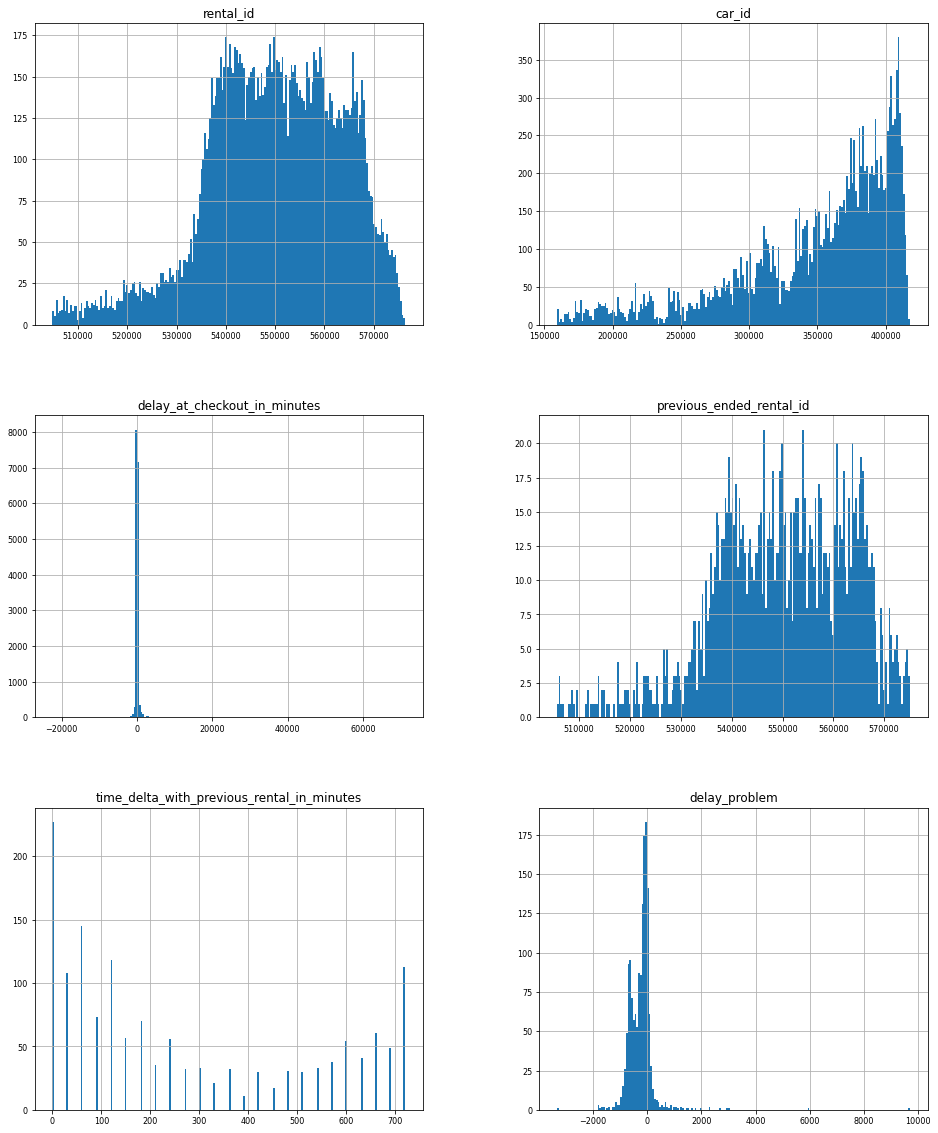

In [109]:
# listing dataframes types
list(set(dataset_delay.dtypes.tolist()))
# include only float and integer
df_delay_num = dataset_delay.select_dtypes(include = ['float64', 'int64', 'UInt32'])
# display what has been selected
df_delay_num.head()
# plot
df_delay_num.hist(figsize=(16, 20), bins=200, xlabelsize=8, ylabelsize=8);

In [104]:
#Count the number of cases where the delay at check out was higher than expected
dataset_delay['delay_problem']= dataset_delay['delay_at_checkout_in_minutes']-dataset_delay['time_delta_with_previous_rental_in_minutes']

In [105]:
dataset_delay.dropna(subset=['delay_at_checkout_in_minutes'], inplace=True)
dataset_delay = dataset_delay.reset_index(drop=True)
dataset_delay

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay_problem
0,507750.0,269550.0,mobile,ended,-81.0,NaN,NaN,NaN
1,508131.0,359049.0,connect,ended,70.0,NaN,NaN,NaN
2,511626.0,398802.0,mobile,ended,-203.0,NaN,NaN,NaN
3,511639.0,370585.0,connect,ended,-15.0,563782.0,570.0,-585.0
4,512303.0,371242.0,mobile,ended,-44.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
16341,573322.0,376491.0,connect,ended,-66.0,NaN,NaN,NaN
16342,573790.0,341965.0,mobile,ended,-337.0,NaN,NaN,NaN
16343,573791.0,364890.0,mobile,ended,144.0,NaN,NaN,NaN
16344,574852.0,362531.0,connect,ended,-76.0,NaN,NaN,NaN


In [85]:
dataset_delay.checkin_type.value_counts()

mobile     17003
connect     4307
Name: checkin_type, dtype: int64

In [106]:
def compute_stats_threshold(delay_tresh, check_type):
    if check_type == 'connect':
        nb_rent_above_threshold = dataset_delay[(dataset_delay['delay_at_checkout_in_minutes'] > delay_tresh) & (dataset_delay['checkin_type']=='connect')].count()
    else :
        nb_rent_above_threshold = dataset_delay[(dataset_delay['delay_at_checkout_in_minutes'] > delay_tresh) & (dataset_delay['checkin_type']=='mobile')].count()
    return nb_rent_above_threshold

In [107]:
x_plot=dict()
y_mobile=dict()
y_connect=dict()
y_mobile_ratio=dict()
y_connect_ratio=dict()

nb_rent_connect=  dataset_delay[dataset_delay['checkin_type']=='connect'].count()[0]
nb_rent_mobile=  dataset_delay[dataset_delay['checkin_type']=='mobile'].count()[0]

for i in range (0,400):
    x_plot[i]=i
    y_mobile[i]=(compute_stats_threshold(i,'mobile')[0])
    y_connect[i]=(compute_stats_threshold(i,'connect')[0])
    y_mobile_ratio[i]=(compute_stats_threshold(i,'mobile')[0])/nb_rent_mobile*100
    y_connect_ratio[i]=(compute_stats_threshold(i,'connect')[0])/nb_rent_connect*100

Il y a 28% de perte de location pour les réservations sur mobile avec 1h de battement entre deux locations. 18% pour les réservations avec connect

<AxesSubplot:xlabel='Threshold (min)', ylabel='Rent_lost_mobile(%)'>

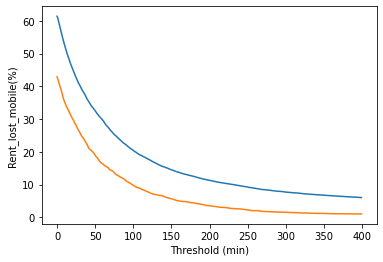

In [108]:
# Plot the responses for different events and regions
df_delay_stat_treshold = pd.DataFrame({'Threshold (min)': x_plot.values(),'Rent_lost_mobile(%)': y_mobile_ratio.values(),'Rent_lost_connect(%)': y_connect_ratio.values()})
sns.lineplot(x='Threshold (min)', y="Rent_lost_mobile(%)",data=df_delay_stat_treshold)
sns.lineplot(x='Threshold (min)', y="Rent_lost_connect(%)",data=df_delay_stat_treshold)

In [110]:
df_delay_stat_treshold.iloc[2]

Threshold (min)          2.000000
Rent_lost_mobile(%)     59.765142
Rent_lost_connect(%)    41.358025
Name: 2, dtype: float64

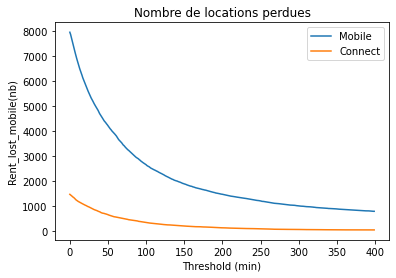

In [111]:
# Plot the responses for different events and regions
df_delay_stat_treshold = pd.DataFrame({'Threshold (min)': x_plot.values(),'Rent_lost_mobile(nb)': y_mobile.values(),'Rent_lost_connect(nb)': y_connect.values()})
sns.lineplot(x = 'Threshold (min)', y = "Rent_lost_mobile(nb)", data = df_delay_stat_treshold)
sns.lineplot(x = 'Threshold (min)', y = "Rent_lost_connect(nb)", data = df_delay_stat_treshold)
plt.title('Nombre de locations perdues')
plt.legend(labels = ["Mobile", "Connect"], loc = "upper right");


# Question 4 : How many problematic cases will it solve depending on the chosen threshold and scope?

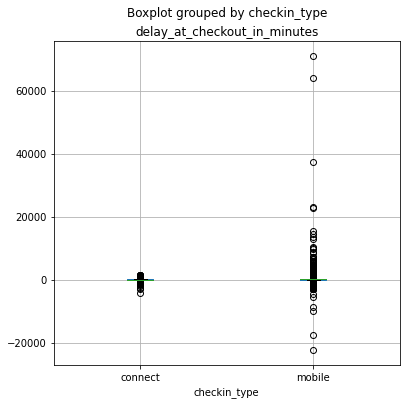

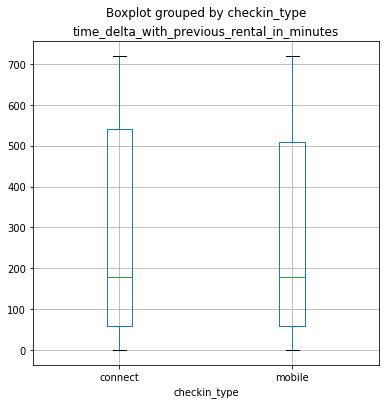

In [16]:
features = ['delay_at_checkout_in_minutes','time_delta_with_previous_rental_in_minutes']
for col in features:
    dataset_delay.boxplot(column=col, by='checkin_type', figsize=(6,6))
    plt.title(col)
plt.show()

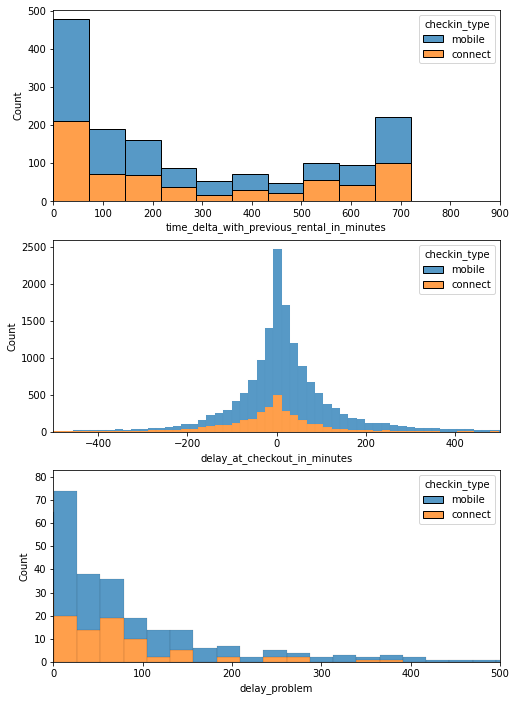

In [17]:
# Analyse statistique par type de réservation
fig, axes = plt.subplots(3,1,figsize=(8,12))
sns.color_palette("hls", 8)
sns.histplot(data=dataset_delay, x="time_delta_with_previous_rental_in_minutes",hue=dataset_delay["checkin_type"],multiple='stack',bins=10,stat="count",ax=axes[0])
sns.histplot(data=dataset_delay, x="delay_at_checkout_in_minutes",hue=dataset_delay["checkin_type"],multiple='stack',bins=5000,stat="count",ax=axes[1])
sns.histplot(data=dataset_delay, x="delay_problem",hue=dataset_delay["checkin_type"],multiple='stack',bins=500,stat="count",ax=axes[2])
axes[0].set_xlim(0, 900)
axes[1].set_xlim(-500,500)
axes[2].set_xlim(0, 500)
plt.show()

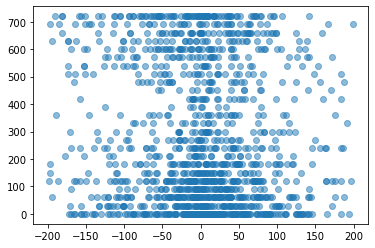

In [18]:
df_delay_reduced = df_delay_num[(df_delay_num['delay_at_checkout_in_minutes'] > -200) & (df_delay_num['delay_at_checkout_in_minutes'] < 200)]
plt.scatter(df_delay_reduced['delay_at_checkout_in_minutes'], df_delay_reduced['time_delta_with_previous_rental_in_minutes'], alpha=0.5)
plt.show()

# Prédiction - Regression

In [15]:
dataset_pricing = pd.read_csv('get_around_pricing_project.csv')

In [16]:
dataset_pricing.shape

(4843, 15)

<AxesSubplot:>

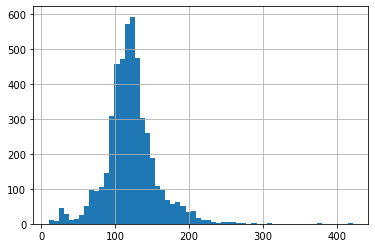

In [17]:
dataset_pricing.rental_price_per_day.hist(bins=60)

In [18]:
dataset_pricing = dataset_pricing.drop("Unnamed: 0", axis =1)

In [19]:
dataset_pricing.model_key = dataset_pricing.model_key.replace(["Maserati", "Ferrari", "Porsche", "Lamborghini"], "Luxe")
dataset_pricing.model_key = dataset_pricing.model_key.replace(dataset_pricing.model_key.value_counts()[dataset_pricing.model_key.value_counts() < 10].index, "Autres")
dataset_pricing.model_key.value_counts()

Citroën       969
Renault       916
BMW           827
Peugeot       642
Audi          526
Nissan        275
Mitsubishi    231
Mercedes       97
Volkswagen     65
Luxe           59
Toyota         53
SEAT           46
Subaru         44
PGO            33
Opel           33
Autres         27
Name: model_key, dtype: int64

Suppression des outliers

In [20]:
dataset_pricing = dataset_pricing[(dataset_pricing['engine_power'] > 50) & (dataset_pricing['engine_power'] < 400)]
dataset_pricing = dataset_pricing[dataset_pricing['mileage'] < 700000]
dataset_pricing = dataset_pricing[dataset_pricing['rental_price_per_day'] < 275]

In [21]:
dataset_pricing.isnull().sum()

model_key                    0
mileage                      0
engine_power                 0
fuel                         0
paint_color                  0
car_type                     0
private_parking_available    0
has_gps                      0
has_air_conditioning         0
automatic_car                0
has_getaround_connect        0
has_speed_regulator          0
winter_tires                 0
rental_price_per_day         0
dtype: int64

In [30]:
categorical = dataset_pricing.columns.drop(["mileage","engine_power", "rental_price_per_day"])
continuous = ["mileage","engine_power"]

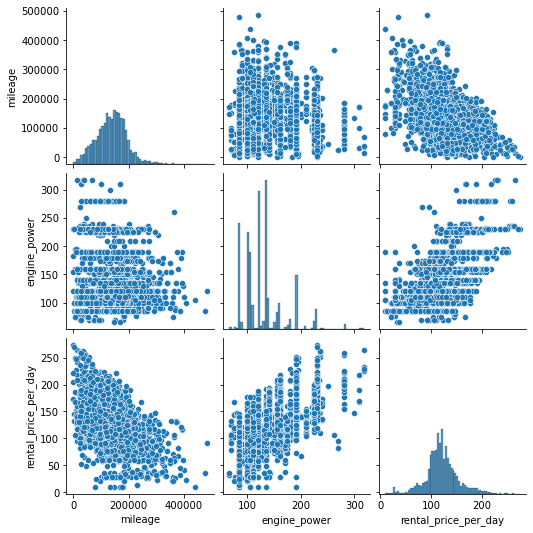

In [24]:
sns.pairplot(dataset_pricing[continuous])

In [29]:
dataset_pricing.columns.drop(["rental_price_per_day"])

Index(['model_key', 'mileage', 'engine_power', 'fuel', 'paint_color',
       'car_type', 'private_parking_available', 'has_gps',
       'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
       'has_speed_regulator', 'winter_tires'],
      dtype='object')

In [31]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = dataset_pricing.columns.drop(["rental_price_per_day"])
target_variable = "rental_price_per_day"

X = dataset_pricing.loc[:,features_list]
Y = dataset_pricing.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    106
1    264
2    101
3    158
4    183
Name: rental_price_per_day, dtype: int64

X :
  model_key  mileage  engine_power    fuel paint_color     car_type  \
0   Citroën   140411           100  diesel       black  convertible   
1   Citroën    13929           317  petrol        grey  convertible   
2   Citroën   183297           120  diesel       white  convertible   
3   Citroën   128035           135  diesel         red  convertible   
4   Citroën    97097           160  diesel      silver  convertible   

   private_parking_available  has_gps  has_air_conditioning  automatic_car  \
0                       True     True                 False          False   
1                       True     True                 False          False   
2                      False    False                 False          False   
3                       True     True                 False          False   
4                       True     True     

In [32]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=X['car_type'])
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [33]:
print("Preprocessing X_train...")
print(X_train.head())
print()

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, continuous),
        ('cat', categorical_transformer, categorical)
    ])

X_train = preprocessor.fit_transform(X_train)
print("...Done!")
print(X_train[0:5,:]) # X_train is now a numpy array
print()

Preprocessing X_train...
     model_key  mileage  engine_power    fuel paint_color car_type  \
495    Renault   149069           135  diesel        blue   estate   
4239       BMW   108628           140  diesel       black      suv   
4326    Nissan    54723            85  diesel       brown      suv   
1267   Renault   139012           135  diesel        grey   estate   
722       Audi   305358           120  diesel        blue   estate   

      private_parking_available  has_gps  has_air_conditioning  automatic_car  \
495                        True     True                  True          False   
4239                       True     True                 False           True   
4326                       True     True                  True          False   
1267                       True     True                 False          False   
722                        True     True                 False          False   

      has_getaround_connect  has_speed_regulator  winter_tires  
49

In [34]:
# Test pipeline
print("Preprocessing X_test...")
print(X_test.head())
print()
X_test = preprocessor.transform(X_test)
print("...Done!")
print(X_test[0:5,:]) # X_test is now a numpy array
print() 

Preprocessing X_test...
     model_key  mileage  engine_power    fuel paint_color car_type  \
2852      Audi   200019           150  diesel       black    sedan   
4026       BMW    89713           120  diesel      silver      suv   
3913    Nissan   179288           105  diesel       white      suv   
3178   Peugeot   163289           100  diesel        grey    sedan   
801       Audi   197565           120  diesel        blue   estate   

      private_parking_available  has_gps  has_air_conditioning  automatic_car  \
2852                      False     True                 False          False   
4026                       True     True                 False           True   
3913                      False     True                 False          False   
3178                       True     True                 False          False   
801                        True    False                 False          False   

      has_getaround_connect  has_speed_regulator  winter_tires  
285

In [35]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [36]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[129.45438071 151.76955187 123.46811248 ... 158.11967572  96.44514076
  34.38124376]



In [37]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[117.11971951 139.92612947 102.8384518  102.81757348  87.40480503
 115.45463064  98.49313404 126.03556089 122.53952163  78.31679094
  67.86642273 121.45717568 102.13777499 142.27824228 137.02934953
 133.55204071  92.13643764 104.10951434 121.08510684 109.10296784
 159.76254726 107.95210005 132.04337599 138.82345774 145.81582946
  70.16817902 106.86346526 135.22611676 109.79677055 122.49342367
 157.05524767 135.86975809 129.77784815 116.39027792 140.20932931
  90.87838696  92.31936686 127.12041066 114.73705094  83.68880381
 128.68152613 108.53767505  96.30692879 173.12983548 127.98211208
 114.94287474 144.91918618 143.9785716   98.32452    129.37432969
 114.95911978 108.5740242  127.18892774 111.92949264 123.87470987
 153.20598572 178.27120791 131.25809483 105.52219921 142.56331169
 106.24811808 114.71340946 174.7000277  137.96720273  67.743847
 102.95739311 116.56664053 123.21685918 145.16714379 100.43231261
 136.12642368 154.05159579 114.59437582 13

In [38]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.730101883403715
R2 score on test set :  0.7097261105133226


Export des modèles pour déploiement

In [39]:
import joblib
filename = 'finalized_model.sav'
joblib.dump(regressor, filename)
filename = 'finalized_prepoc.sav'
joblib.dump(preprocessor, filename)

['finalized_prepoc.sav']

In [40]:
regressor.coef_

array([-13.38483454,  14.12611843,  -5.61882441,  -5.27839557,
        -7.20378632,  10.5102533 ,  12.23480551,   8.29894476,
       -12.78170573,  15.48373854, -16.57191338,  -3.7139752 ,
         3.29591036,  20.24137358,   8.0143722 ,  21.97235088,
        13.57874083,   9.10303278,  -0.45411549, -20.65274452,
        -0.06465871,  -2.88593818,   1.33296352, -22.67429755,
        -1.824137  ,  -2.52309673,   1.75926925,  -3.81890028,
         3.28643142,   1.27129033,  -9.46552066,  -8.59887134,
        -3.49830242,  -7.72571154,   3.37253877, -26.8706444 ,
         1.07857496,  11.60401996,   0.46433302,   4.6649909 ,
         5.08239086,   5.08727615,  -1.43774823])

In [41]:
column_names = []
for name, pipeline, features_list in preprocessor.transformers_: # loop over pipelines
    if name == 'num': # if pipeline is for numeric variables
        features = features_list # just get the names of columns to which it has been applied
    else: # if pipeline is for categorical variables
        features = pipeline.named_steps['encoder'].get_feature_names_out() # get output columns names from OneHotEncoder
    column_names.extend(features) # concatenate features names
        
print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['mileage', 'engine_power', 'model_key_Autres', 'model_key_BMW', 'model_key_Citroën', 'model_key_Luxe', 'model_key_Mercedes', 'model_key_Mitsubishi', 'model_key_Nissan', 'model_key_Opel', 'model_key_PGO', 'model_key_Peugeot', 'model_key_Renault', 'model_key_SEAT', 'model_key_Subaru', 'model_key_Toyota', 'model_key_Volkswagen', 'fuel_electro', 'fuel_hybrid_petrol', 'fuel_petrol', 'paint_color_black', 'paint_color_blue', 'paint_color_brown', 'paint_color_green', 'paint_color_grey', 'paint_color_orange', 'paint_color_red', 'paint_color_silver', 'paint_color_white', 'car_type_coupe', 'car_type_estate', 'car_type_hatchback', 'car_type_sedan', 'car_type_subcompact', 'car_type_suv', 'car_type_van', 'private_parking_available_True', 'has_gps_True', 'has_air_conditioning_True', 'automatic_car_True', 'has_getaround_connect_True', 'has_speed_regulator_True', 'winter_tires_True']


In [42]:
# Create a pandas DataFrame
coefs = pd.DataFrame(index = column_names, data = regressor.coef_.transpose(), columns=["coefficients"])
coefs

,coefficients
mileage,-13.384835
engine_power,14.126118
model_key_Autres,-5.618824
model_key_BMW,-5.278396
model_key_Citroën,-7.203786
model_key_Luxe,10.510253
model_key_Mercedes,12.234806
model_key_Mitsubishi,8.298945
model_key_Nissan,-12.781706
model_key_Opel,15.483739


In [43]:
# Compute abs() and sort values
feature_importance = abs(coefs).sort_values(by = 'coefficients')
feature_importance

,coefficients
paint_color_black,0.064659
fuel_hybrid_petrol,0.454115
has_air_conditioning_True,0.464333
private_parking_available_True,1.078575
car_type_coupe,1.271290
paint_color_brown,1.332964
winter_tires_True,1.437748
paint_color_red,1.759269
paint_color_grey,1.824137
paint_color_orange,2.523097


In [44]:
pio.renderers.default = "iframe_connected"
# Plot coefficients
fig = px.bar(feature_importance, orientation = 'h')
fig.update_layout(showlegend = False, 
                  margin = {'l': 120} # to avoid cropping of column names
                 )
fig.show()

In [45]:
print("coefficients are: ", regressor.coef_) 
print("Constant is: ", regressor.intercept_)
# Access transformers from feature_encoder
print("All transformers are: ", preprocessor.transformers)

# Access one specific transformer
print("One Hot Encoder transformer is: ", preprocessor.transformers[0][1])

coefficients are:  [-13.38483454  14.12611843  -5.61882441  -5.27839557  -7.20378632
  10.5102533   12.23480551   8.29894476 -12.78170573  15.48373854
 -16.57191338  -3.7139752    3.29591036  20.24137358   8.0143722
  21.97235088  13.57874083   9.10303278  -0.45411549 -20.65274452
  -0.06465871  -2.88593818   1.33296352 -22.67429755  -1.824137
  -2.52309673   1.75926925  -3.81890028   3.28643142   1.27129033
  -9.46552066  -8.59887134  -3.49830242  -7.72571154   3.37253877
 -26.8706444    1.07857496  11.60401996   0.46433302   4.6649909
   5.08239086   5.08727615  -1.43774823]
Constant is:  116.25003179993597
All transformers are:  [('num', Pipeline(steps=[('scaler', StandardScaler())]), ['mileage', 'engine_power']), ('cat', Pipeline(steps=[('encoder', OneHotEncoder(drop='first'))]), Index(['model_key', 'fuel', 'paint_color', 'car_type',
       'private_parking_available', 'has_gps', 'has_air_conditioning',
       'automatic_car', 'has_getaround_connect', 'has_speed_regulator',
       

# Ridge

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
import warnings

params = {'alpha' : range(100)}
ridge = Ridge()
grid = GridSearchCV(ridge, param_grid=params, cv = 10, verbose=1)

grid.fit(X_train, Y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Ridge(), param_grid={'alpha': range(0, 100)},
             verbose=1)

In [76]:
print("BEST ESTIMATOR")
print("test R^2")
best_model = grid.best_estimator_
print(best_model.score(X_train, Y_train))
print("test R^2")
print(best_model.score(X_test, Y_test))
print("train MSE")
print(mean_squared_error(Y_train,best_model.predict(X_train)))
print("test MSE")
print(mean_squared_error(Y_test,best_model.predict(X_test)))

BEST ESTIMATOR
test R^2
0.7290784651218877
test R^2
0.7086227868368182
train MSE
293.9817787117095
test MSE
308.94669925851366


In [77]:
grid.best_params_

{'alpha': 6}

# Lasso

In [78]:
from sklearn.linear_model import Lasso

params = {'alpha' : [10**(-a/10) for a in range(0,30,3)]}
lasso = Lasso()
grid2 = GridSearchCV(lasso,param_grid=params, cv = 10, verbose=1)

grid2.fit(X_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1.0, 0.5011872336272722, 0.251188643150958,
                                   0.12589254117941673, 0.06309573444801933,
                                   0.03162277660168379, 0.015848931924611134,
                                   0.007943282347242814, 0.003981071705534973,
                                   0.001995262314968879]},
             verbose=1)

In [79]:
grid.best_params_

{'alpha': 6}

In [80]:
print("BEST ESTIMATOR")
print("train r2")
best_model_2 = grid2.best_estimator_
print(best_model_2.score(X_train, Y_train))
print("test r2")
print(best_model_2.score(X_test, Y_test))
print("train MSE")
print(mean_squared_error(Y_train,best_model_2.predict(X_train)))
print("test MSE ")
print(mean_squared_error(Y_test,best_model_2.predict(X_test)))


BEST ESTIMATOR
train r2
0.729318233882017
test r2
0.708178570880102
train MSE
293.7216013632605
test MSE 
309.4177005838938


In [82]:
coef = pd.DataFrame()
coef['features'] = column_names
coef['coef_linear_regressor'] = regressor.coef_
coef['coef_ridge_best'] = best_model.coef_
coef['coef_lasso_best'] = best_model_2.coef_
coef.head()

,features,coef_linear_regressor,coef_ridge_best,coef_lasso_best
0,mileage,-13.384835,-13.455075,-13.459032
1,engine_power,14.126118,14.222270,14.296452
2,model_key_Autres,-5.618824,-6.461427,-4.313701
3,model_key_BMW,-5.278396,-7.113186,-6.845073
4,model_key_Citroën,-7.203786,-7.453247,-7.290133


In [72]:
import joblib
dataset_pricing.columns
predict_array = np.zeros((1,13))
im_df = pd.DataFrame(predict_array, columns=dataset_pricing.columns)
im_df[0:1] = ['Citroën', 140000, 120, 'diesel', 'black', 'convertible', True, True, True, True, True, True, True]
loaded_model = joblib.load('finalized_model.sav')
pipeline = joblib.load('finalized_prepoc.sav')
result = loaded_model.predict(pipeline.transform(im_df))
result

array([132.49054522])